Steps to Use the Elbow Method:
* Choose a range of values for k
* Fit the KNN model with each value of k
* Compute the error rate for each k
* Plot the error rate against the corresponding k values
* Identify the "elbow" point on the plot, where the rate of decrease in error rate slows down significantly.
* Choose the value of k at the elbow point as the optimal number of neighbors for the KNN model

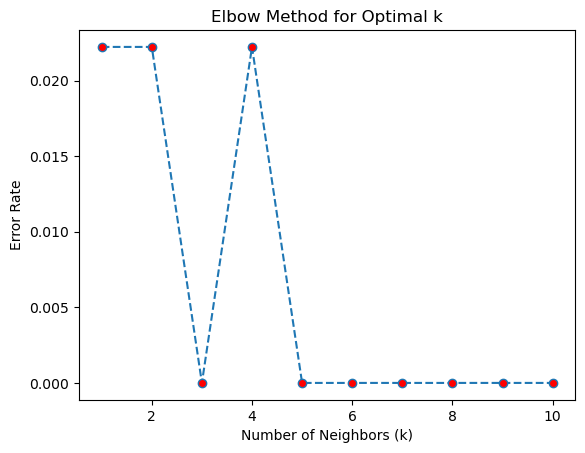

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42, test_size = 0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

error_rate = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    """print("y_pred", y_pred)
    print("y_test", y_test)
    print("y_pred != y_test", y_pred != y_test)
    print("y_pred != y_test", np.mean(y_pred != y_test)) """
    error_rate.append(np.mean(y_pred != y_test))


# Plot Error Rate vs. number of nearest neighbors (k)
plt.plot(range(1, 11), error_rate, marker='o', 
         markerfacecolor='red', linestyle='dashed')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.show()

In [37]:
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Predicted", y_pred)
print("Actual", y_test)
print("accuracy_score: ", accuracy_score(y_pred, y_test))

Predicted [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
accuracy_score:  1.0
